## Data Exploration

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [86]:
np.random.seed(42)

In [87]:
df = pd.read_csv("datasets/historical_data.csv")
df.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,1845,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,5477,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,5477,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,446,690.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,5477,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0,446,289.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,5477,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,446,650.0


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 16 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   market_id                                     196441 non-null  float64
 1   created_at                                    197428 non-null  object 
 2   actual_delivery_time                          197421 non-null  object 
 3   store_id                                      197428 non-null  int64  
 4   store_primary_category                        192668 non-null  object 
 5   order_protocol                                196433 non-null  float64
 6   total_items                                   197428 non-null  int64  
 7   subtotal                                      197428 non-null  int64  
 8   num_distinct_items                            197428 non-null  int64  
 9   min_item_price                                19

In [89]:

# convert the value of `created_at` and `actual_deliverty_time` to datetime
df['created_at'] = pd.to_datetime(df['created_at'])
df['actual_delivery_time'] = pd.to_datetime(df['actual_delivery_time'])

#### Create a target variable(column) for regression
Here we will create a new column `actual_total_delivery_duration` by substracting the times between `actual_delivery_time` with `created_at`.
This new column `actual_total_delivery_duration` will be used as target variable for regression.
- `.dt.total_seconds()` &rarr; used to convert the newly created pandas datetime object to seconds.

In [90]:
df['actual_total_delivery_duration'] = (df['actual_delivery_time'] - df['created_at']).dt.total_seconds()
df.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,actual_total_delivery_duration
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,1845,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0,3779.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,5477,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0,4024.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,5477,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,446,690.0,1781.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,5477,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0,446,289.0,3075.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,5477,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,446,650.0,2390.0


In [91]:
df['estimated_non_prep_duration'] = df['estimated_store_to_consumer_driving_duration'] + df['estimated_order_place_duration']
df.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,actual_total_delivery_duration,estimated_non_prep_duration
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,1845,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0,3779.0,1307.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,5477,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0,4024.0,1136.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,5477,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,446,690.0,1781.0,1136.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,5477,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0,446,289.0,3075.0,735.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,5477,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,446,650.0,2390.0,1096.0


- Create a new column `busy_dashers_ratio` by dividing `total_busy_dashers` by `total_onshift_dashers`

In [92]:
df['busy_dashers_ratio'] = df['total_busy_dashers'] / df['total_onshift_dashers']
df.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,actual_total_delivery_duration,estimated_non_prep_duration,busy_dashers_ratio
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,1845,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0,3779.0,1307.0,0.424242
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,5477,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0,4024.0,1136.0,2.000000
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,5477,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,446,690.0,1781.0,1136.0,0.000000
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,5477,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0,446,289.0,3075.0,735.0,1.000000
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,5477,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,446,650.0,2390.0,1096.0,1.000000


## Data Preparation for modelling
Check the unique market id to determine how many states of data we are dealing with
- `nunique()` &rarr; returns number of unique values in a DataFrame.

In [93]:
df['market_id'].nunique()

6

In [94]:
df['store_id'].nunique()

6743

In [95]:
df['order_protocol'].nunique()

7

##### Create a dictionary with most repeated categories of each store to fill null rows where possible.
To find out the most repeated categories we have a column `store_primary_category` which gives the most served category in that store.
We first create a list `store_id_unique` which contains unique values from the column `store_id`.
Then we will create a dictionary with id of a particular store as the *key* of the dictionary.
Then, for the *value* we will create a seperate dataframe which contains only the details of a particular store and we will find the mode(most repeated value) of the column `store_primary_category` from that seperate dataframe which will give the most repeated food category of a particular store.

- `unique()` &rarr; extract only unique values from an iterator
- `tolist()` &rarr; convert the pandas array object to python list
- `df[df.store_id == store_id]` &rarr; Group out the details of a particular store into a dataframe which contains only rows of that store.
- `mode()` &rarr; Returns the most repeated value in an iterable.

In [96]:
store_id_unique = df['store_id'].unique().tolist()
store_id_and_category = {store_id: df[df.store_id == store_id].store_primary_category.mode() for store_id in store_id_unique}

We create a `fill()` function which takes the **store_id** as a parameter and returns the primary store category from the dictionary `store_id_and_category`.<br/>
Then we create a new column `nan_free_store_primary_category` and fill the most repeated the category as values in this column.

In [97]:
def fill(store_id):
	try:
		return store_id_and_category[store_id].values[0]
	except:
		np.nan

df['nan_free_store_primary_category'] = df.store_id.apply(fill)
df.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,actual_total_delivery_duration,estimated_non_prep_duration,busy_dashers_ratio,nan_free_store_primary_category
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,1845,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0,3779.0,1307.0,0.424242,american
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,5477,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0,4024.0,1136.0,2.000000,indian
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,5477,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,446,690.0,1781.0,1136.0,0.000000,indian
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,5477,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0,446,289.0,3075.0,735.0,1.000000,indian
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,5477,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,446,650.0,2390.0,1096.0,1.000000,indian


**Creating Dummy Variable**<br/>
Let's create a dummy variable for the `order_protocol` column.<br/>
When working with data, it is common to encounter categorical variables that are non-numeric. These variables cannot be used directly in machine learnig models. So, one way to use them is by creating seperate column for each category and assigning **1** or **0** to indicate whether the category is present in each observation.

- `get_dummies()` &rarr; Creates a new dataframe with column of each unique category in original dataframe, and assigns 1 or 0 to indicate whether the category is present.
- `add_prefix()` &rarr; Adds `order_protocol_` as prefix to every column in a df. Doesn't affect the original df.

In [98]:
order_protocol_dummies = pd.get_dummies(df.order_protocol)
order_protocol_dummies = order_protocol_dummies.add_prefix('order_protocol_')
order_protocol_dummies.head()

,order_protocol_1.0,order_protocol_2.0,order_protocol_3.0,order_protocol_4.0,order_protocol_5.0,order_protocol_6.0,order_protocol_7.0
0,True,False,False,False,False,False,False
1,False,True,False,False,False,False,False
2,True,False,False,False,False,False,False
3,True,False,False,False,False,False,False
4,True,False,False,False,False,False,False


In [99]:
df.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,actual_total_delivery_duration,estimated_non_prep_duration,busy_dashers_ratio,nan_free_store_primary_category
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,1845,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0,3779.0,1307.0,0.424242,american
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,5477,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0,4024.0,1136.0,2.000000,indian
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,5477,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,446,690.0,1781.0,1136.0,0.000000,indian
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,5477,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0,446,289.0,3075.0,735.0,1.000000,indian
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,5477,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,446,650.0,2390.0,1096.0,1.000000,indian


In [100]:
# market id dummies 
market_id_dummy = pd.get_dummies(df.market_id)
market_id_dummy = market_id_dummy.add_prefix('market_id_')
market_id_dummy.head()

,market_id_1.0,market_id_2.0,market_id_3.0,market_id_4.0,market_id_5.0,market_id_6.0
0,True,False,False,False,False,False
1,False,True,False,False,False,False
2,False,False,True,False,False,False
3,False,False,True,False,False,False
4,False,False,True,False,False,False


In [101]:
# store primary category dummies
store_primary_category_dummies = pd.get_dummies(df.nan_free_store_primary_category)
store_primary_category_dummies = store_primary_category_dummies.add_prefix('category_')
store_primary_category_dummies.head()

,category_afghan,category_african,category_alcohol,category_alcohol-plus-food,category_american,category_argentine,category_asian,category_barbecue,category_belgian,category_brazilian,...,category_southern,category_spanish,category_steak,category_sushi,category_tapas,category_thai,category_turkish,category_vegan,category_vegetarian,category_vietnamese
0,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [102]:
df.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,actual_total_delivery_duration,estimated_non_prep_duration,busy_dashers_ratio,nan_free_store_primary_category
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,1845,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0,3779.0,1307.0,0.424242,american
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,5477,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0,4024.0,1136.0,2.000000,indian
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,5477,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,446,690.0,1781.0,1136.0,0.000000,indian
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,5477,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0,446,289.0,3075.0,735.0,1.000000,indian
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,5477,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,446,650.0,2390.0,1096.0,1.000000,indian


In [103]:
# create a training dataframe by dropping unnessary columns
train_df = df.drop(columns= ['created_at', 'market_id', 'store_id', 'store_primary_category', 'actual_delivery_time', 'nan_free_store_primary_category', 'order_protocol'])
train_df.head()

,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,actual_total_delivery_duration,estimated_non_prep_duration,busy_dashers_ratio
0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0,3779.0,1307.0,0.424242
1,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0,4024.0,1136.0,2.000000
2,1,1900,1,1900,1900,1.0,0.0,0.0,446,690.0,1781.0,1136.0,0.000000
3,6,6900,5,600,1800,1.0,1.0,2.0,446,289.0,3075.0,735.0,1.000000
4,3,3900,3,1100,1600,6.0,6.0,9.0,446,650.0,2390.0,1096.0,1.000000


**Concat all dataframes**
- `concat()` &rarr; Concatinate two dataframes along a particular axis (**0**: row, **1**: column).
- `astype()` &rarr; Cast a pandas object to specific datatype. `float32` uses 32 bits of precision which uses less memory than normal float64.
- In `float32` &rarr; **1** bit is used for sign, **8** for exponent of numbers in base 2 and **23** for mantissa.

In [104]:
# concat all dataframes to create final training dataframe
train_df = pd.concat([train_df, order_protocol_dummies, market_id_dummy, store_primary_category_dummies], axis=1)
train_df = train_df.astype('float32')
train_df.head()

,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,...,category_southern,category_spanish,category_steak,category_sushi,category_tapas,category_thai,category_turkish,category_vegan,category_vegetarian,category_vietnamese
0,4.0,3441.0,4.0,557.0,1239.0,33.0,14.0,21.0,446.0,861.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1900.0,1.0,1400.0,1400.0,1.0,2.0,2.0,446.0,690.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1900.0,1.0,1900.0,1900.0,1.0,0.0,0.0,446.0,690.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,6.0,6900.0,5.0,600.0,1800.0,1.0,1.0,2.0,446.0,289.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3.0,3900.0,3.0,1100.0,1600.0,6.0,6.0,9.0,446.0,650.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


The `describe()` method provides *statistical* summary of a dataframe. It returns a new dataframe that includes the following statistics.
- `count` &rarr; Number of not null values in the column.
- `mean` &rarr; Arithmatic mean of the values in the column.
- `std` &rarr; Standard Deviation
- `min` &rarr; Minimum value in the column
- `25%` &rarr; The value at the 25th percentile of the column
- `50%` &rarr; The value at the 50th percentile of the column
- `75%` &rarr; The value at the 75th percentile of the column
- `max` &rarr; The maximum value in the column.

In [105]:
train_df.describe()

,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,...,category_southern,category_spanish,category_steak,category_sushi,category_tapas,category_thai,category_turkish,category_vegan,category_vegetarian,category_vietnamese
count,197428.000000,197428.000000,197428.000000,197428.000000,197428.000000,181166.000000,181166.000000,181166.000000,197428.000000,196902.000000,...,197428.000000,197428.000000,197428.000000,197428.000000,197428.000000,197428.000000,197428.000000,197428.000000,197428.000000,197428.000000
mean,3.196391,2682.331543,2.670791,686.218506,1159.588623,44.808094,41.739746,58.050064,308.560181,545.358948,...,0.000815,0.000187,0.005465,0.011300,0.000740,0.037254,0.001175,0.001433,0.004234,0.030928
std,2.666546,1823.093750,1.630255,522.038635,558.411377,34.526787,32.145733,52.661831,90.139648,219.352905,...,0.028545,0.013689,0.073725,0.105701,0.027184,0.189384,0.034260,0.037834,0.064935,0.173122
min,1.000000,0.000000,1.000000,-86.000000,0.000000,-4.000000,-5.000000,-6.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,1400.000000,1.000000,299.000000,800.000000,17.000000,15.000000,17.000000,251.000000,382.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,2200.000000,2.000000,595.000000,1095.000000,37.000000,34.000000,41.000000,251.000000,544.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.000000,3395.000000,3.000000,949.000000,1395.000000,65.000000,62.000000,85.000000,446.000000,702.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,411.000000,27100.000000,20.000000,14700.000000,14700.000000,171.000000,154.000000,285.000000,2715.000000,2088.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [106]:
train_df['busy_dashers_ratio'].describe()

count    1.775900e+05
mean              NaN
std               NaN
min              -inf
25%      8.269231e-01
50%      9.622642e-01
75%      1.000000e+00
max               inf
Name: busy_dashers_ratio, dtype: float64

#### Check for Infinite or NaN values
Check if the `train_df` contains any infinite or NaN values to delete from the dataframe.

- **np.any()** <br/>
`np.any(array, axis)` function returns True if any element of an array evulates to True and False otherwise. Takes **array** and **axis** as arguments. Where, `axis=0` evulates along the rows and `axis=1` evulates along the columns.

- **np.where()** <br/>
`np.where(condition, x, y)` function takes a condition and applies it to the dataframe. Applies **x** if the condition is **True** and **y** if condition is **False**. If the replacement values is not specified then it returns a numpy array of ***indices*** which returns **True** for the **condition**.

- `np.isfinite()` &rarr; Returns a boolean dataframe that is same shape as `train_df`. **True** if the vlaue is finite and **False** if the value is infinite or NaN.
- `~` &rarr; Inverses the boolean dataframe to show **True** for the infinite or NaN values.
- `np.any` &rarr; Returns **True** if any column in `train_df` contains NaN or infinite; 
- `np.where()` &rarr; Returns the ***indices*** of elements in an array that satisfy a certain condition.




In [107]:
# finding the column indices of 'train_df' that contain any non-finite(NaN or infinite) values
np.where(np.any(~np.isfinite(train_df),axis=0) == True)
train_df.shape

(197428, 100)

- `dropna()` &rarr; Drops rows which contains at least one NaN value. If column needs to be dropped then specify `axis=1`.
- `replace(what, with)` &rarr; replaces negative and positive infinite values with NaN values.

In [108]:
# replace infinite values with NaN to drop all NaN values
train_df.replace([np.inf, -np.inf], np.nan, inplace=True)
#drop all NaN values
train_df.dropna(inplace=True)
train_df.shape

(177070, 100)

#### Remove Collinearity and Redundancy
- `corr()` &rarr; returns **collinear matrix** of the DataFrame.
- `triu()` &rarr; A.k.a "*triangle-upper*"—used to extract the upper triangular part of 2D array while setting all elements below the main diagonal to 0.
- `ones_like(array)` &rarr; returns an array with same shape as input array filled with 1's instead of original array.
- `diverging_palette()` &rarr;  used to create a custom colormap with a smooth transition from one color to another.

<Axes: >

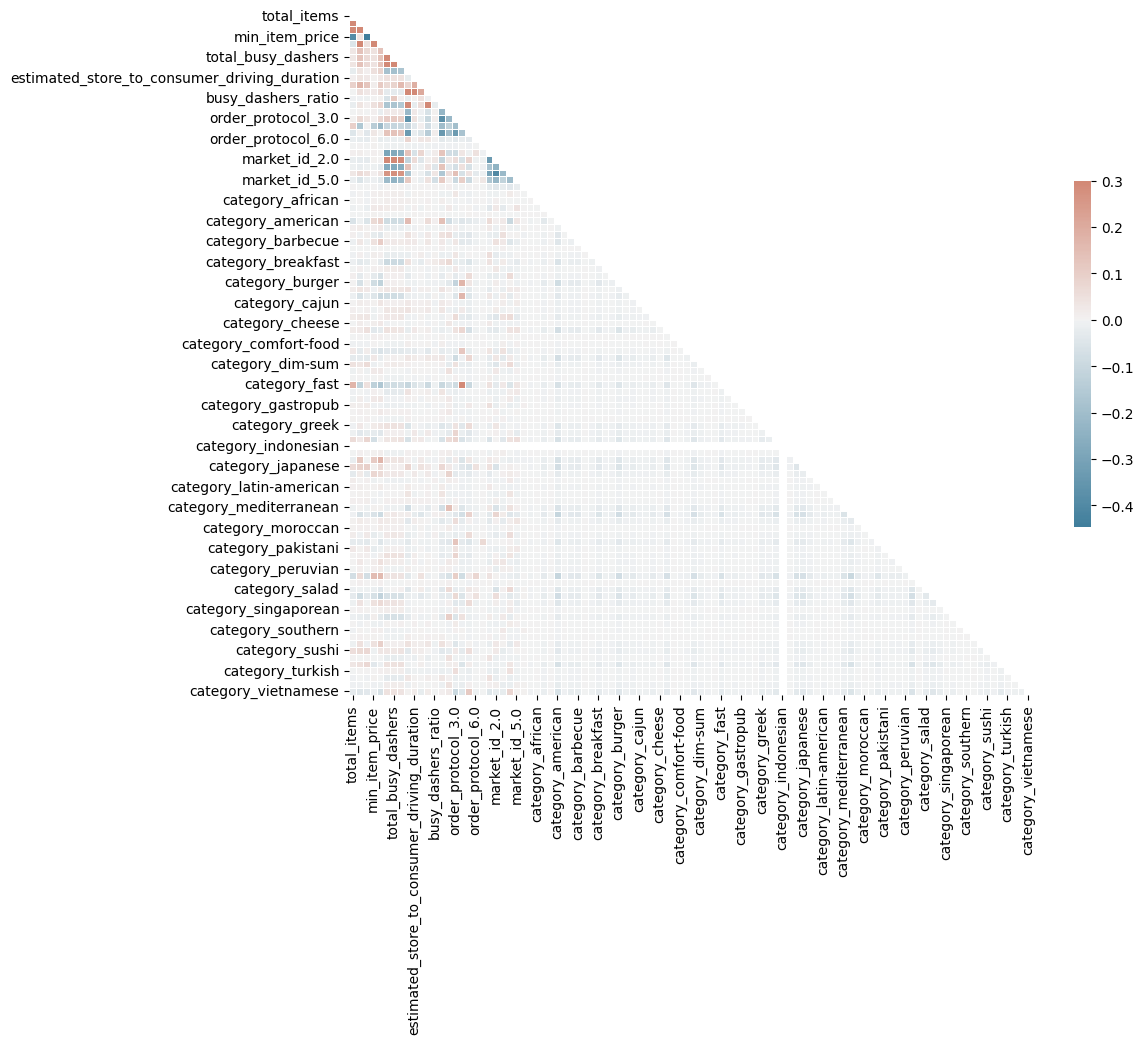

In [109]:
corr = train_df.corr()


mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11,9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, vmax=.3, cmap=cmap, center=0, square=True, linewidths=.5, cbar_kws={'shrink': .5} )

In [110]:
train_df['category_indonesian'].describe()

count    177070.0
mean          0.0
std           0.0
min           0.0
25%           0.0
50%           0.0
75%           0.0
max           0.0
Name: category_indonesian, dtype: float64

In [111]:
def get_redundant_pairs(df):
	"""Get diagnonal and lower triangular pairs of correlation matrix"""
	pairs_to_drop = set()
	cols = df.columns
	for i in range(0, df.shape[1]): #shape is contained in a tuple (rows, cols) so 0=rows and 1=cols
		for j in range(0, i+1): # i+1 to include all the redundant pairs from the lower triangular part
			pairs_to_drop.add((cols[i], cols[j]))
	return pairs_to_drop

#### Drop the redundant pairs and return the absolute correlation in descending order.

- `unstack()` &rarr; reshape data—pivot a label of the index labels to become new column labels.

In [112]:
# au_corr = corr.abs().unstack()
# pd.DataFrame(au_corr)

def get_top_abs_correlations(df, n=5):
	au_corr = df.corr().abs().unstack()
	labels_to_drop = get_redundant_pairs(df)
	au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
	return au_corr[0:n]

In [113]:
print("Top Absolute Correlations")
pd.DataFrame(get_top_abs_correlations(train_df, 20))

Top Absolute Correlations


0
total_onshift_dashers                        total_busy_dashers           0.941741
                                             total_outstanding_orders     0.934639
total_busy_dashers                           total_outstanding_orders     0.931295
estimated_store_to_consumer_driving_duration estimated_non_prep_duration  0.923086
estimated_order_place_duration               order_protocol_1.0           0.897645
total_items                                  num_distinct_items           0.758146
subtotal                                     num_distinct_items           0.682890
total_items                                  subtotal                     0.557175
min_item_price                               max_item_price               0.541241
subtotal                                     max_item_price               0.507947
order_protocol_4.0                           category_fast                0.489946
num_distinct_items                           min_item_price               0.446733
market_id_2.0                                market_id_4.0                0.402421
total_items                                  min_item_price               0.389277
order_protocol_1.0                           order_protocol_3.0           0.373581
estimated_order_place_duration               order_protocol_3.0           0.364170
                                             estimated_non_prep_duration  0.363297
order_protocol_1.0                           order_protocol_5.0           0.342345
market_id_1.0                                market_id_2.0                0.334580
estimated_order_place_duration               order_protocol_5.0           0.333291

In [114]:
train_df = df.drop(columns=['created_at', 'market_id', 'store_id', 'store_primary_category', 'actual_delivery_time', 'nan_free_store_primary_category', 'order_protocol'])

In [115]:
train_df.head()

,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,actual_total_delivery_duration,estimated_non_prep_duration,busy_dashers_ratio
0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0,3779.0,1307.0,0.424242
1,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0,4024.0,1136.0,2.000000
2,1,1900,1,1900,1900,1.0,0.0,0.0,446,690.0,1781.0,1136.0,0.000000
3,6,6900,5,600,1800,1.0,1.0,2.0,446,289.0,3075.0,735.0,1.000000
4,3,3900,3,1100,1600,6.0,6.0,9.0,446,650.0,2390.0,1096.0,1.000000


##### Concat the training dataset with dummy variables

In [116]:
#don't concat market_id dummies
train_df = pd.concat([train_df, order_protocol_dummies, store_primary_category_dummies], axis=1)
train_df

,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,...,category_southern,category_spanish,category_steak,category_sushi,category_tapas,category_thai,category_turkish,category_vegan,category_vegetarian,category_vietnamese
0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0,...,False,False,False,False,False,False,False,False,False,False
1,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0,...,False,False,False,False,False,False,False,False,False,False
2,1,1900,1,1900,1900,1.0,0.0,0.0,446,690.0,...,False,False,False,False,False,False,False,False,False,False
3,6,6900,5,600,1800,1.0,1.0,2.0,446,289.0,...,False,False,False,False,False,False,False,False,False,False
4,3,3900,3,1100,1600,6.0,6.0,9.0,446,650.0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197423,3,1389,3,345,649,17.0,17.0,23.0,251,331.0,...,False,False,False,False,False,False,False,False,False,False
197424,6,3010,4,405,825,12.0,11.0,14.0,251,915.0,...,False,False,False,False,False,False,False,False,False,False
197425,5,1836,3,300,399,39.0,41.0,40.0,251,795.0,...,False,False,False,False,False,False,False,False,False,False
197426,1,1175,1,535,535,7.0,7.0,12.0,446,384.0,...,False,False,False,False,False,False,False,False,False,False


In [117]:
#drop highly correlated features
train_df = train_df.drop(columns=['total_onshift_dashers', 'total_busy_dashers', 'category_indonesian', 'estimated_non_prep_duration'])

##### Convert numeric columns to float32
Select all the numeric columns, from the set of numeric columns remove any *timedelta* datatype and `actual_total_delivery_duration` column and convert all remaining columns to float32.
- `select_dtype()` &rarr; returns the included datatype columns form the dataframe.
- `set1.difference(set2)` &rarr; returns the difference between set1 and set2. $A-B$
- `total_seconds()` &rarr; convert timedelta to actual number of seconds.

In [118]:
num_cols = train_df.select_dtypes(include=['number', 'bool']).columns
timedelta_cols = train_df.select_dtypes(include=['timedelta']).columns
cols_to_convert = num_cols.difference(timedelta_cols).difference(['actual_total_delivery_duration'])
train_df[cols_to_convert] = train_df[cols_to_convert].astype('float32')

In [ ]:
#convert actual_total_delivery_duration to float32
train_df['actual_total_delivery_duration'] = train_df['actual_total_delivery_duration'].astype('float32')

#replace infinite values with nan to drop all nans
train_df.replace([-np.inf, np.inf], np.nan, inplace=True)
train_df.dropna(inplace=True)

In [121]:
print("Top Absolute Correlations")
pd.DataFrame(get_top_abs_correlations(train_df, 20))

Top Absolute Correlations


,,0
estimated_order_place_duration,order_protocol_1.0,0.897645
total_items,num_distinct_items,0.758146
subtotal,num_distinct_items,0.682890
total_items,subtotal,0.557175
min_item_price,max_item_price,0.541241
subtotal,max_item_price,0.507947
order_protocol_4.0,category_fast,0.489946
num_distinct_items,min_item_price,0.446733
total_items,min_item_price,0.389277
order_protocol_1.0,order_protocol_3.0,0.373581


In [125]:
# drop created_at, market_id, store_id, store_primary_category, actual_delivery_time, order_protocol
train_df = df.drop(columns=["created_at", "market_id", "store_id", "store_primary_category",
							"actual_delivery_time", "nan_free_store_primary_category","order_protocol"])

# don't concat order_protocol dummies
train_df = pd.concat([train_df,store_primary_category_dummies], axis=1)

#drop highly correlated features
train_df = train_df.drop(columns=['total_onshift_dashers', 'total_busy_dashers', 'category_indonesian', 'estimated_non_prep_duration'])

# Align dtype over dataset
num_cols = train_df.select_dtypes(include=["number", "bool"]).columns
timedelta_cols = train_df.select_dtypes(include=["timedelta"]).columns
cols_to_convert = num_cols.difference(timedelta_cols).difference(["actual_total_delivery_duration"])
train_df[cols_to_convert] = train_df[cols_to_convert].astype("float32")

# Convert actua_total_delivery_duration to float32
train_df["actual_total_delivery_duration"] = train_df["actual_total_delivery_duration"].astype("float32")

# Replace inf values with NaN to drop all NaNs
train_df.replace([np.inf, -np.inf], np.nan, inplace=True)
train_df.dropna(inplace=True)

print("Top Absolute Correlations")
pd.DataFrame(get_top_abs_correlations(train_df, 20))


Top Absolute Correlations


,,0
total_items,num_distinct_items,0.758146
subtotal,num_distinct_items,0.682890
total_items,subtotal,0.557175
min_item_price,max_item_price,0.541241
subtotal,max_item_price,0.507947
num_distinct_items,min_item_price,0.446733
total_items,min_item_price,0.389277
estimated_store_to_consumer_driving_duration,actual_total_delivery_duration,0.188418
subtotal,actual_total_delivery_duration,0.172312
total_outstanding_orders,estimated_order_place_duration,0.171049
